In [ ]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize
import copy
from openpyxl import load_workbook
from scipy.optimize import minimize_scalar
import functions as func

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})




import ipywidgets as widgets # For interactive plots/buttons
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
col = ['r', 'b', 'g', 'y', 'm', 'c']


 
from matplotlib import cm
# plt.style.use('seaborn-whitegrid')
# prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color']

from HANCModel import HANCModelClass



## 1. Saving

**Chooses**

In [ ]:
# Path for saving the results
# Basline model 

sigma_base = 1.0
alpha_base = 0.72

# Alternative model
sigma_high = 1.5
alpha_high = 0.72

sigma_low = 0.5
alpha_low = 0.72

# Baseline G 
G_base = 0.25


export = False
path = 'exports/postmeeting/'


In [ ]:

list_G =  [ 0.1, 0.2, 0.23, 0.24, 0.25, 0.26, 0.3] #, 0.35, 0.4] #[0.05, 0.1,  0.2, 0.3]  #,  0.6, 0.8 ]#, 1.0]
list_TFP = [1.0, 2.0]



vars = ['U_hh', 'Y', 'L_Y', 'tau', 'wt', 'C_hh', 'ELL_hh', 'G_share',  'G_exp_share']
# vars = ['U_hh', 'C_hh', 'ELL_hh', 'A_hh', 'L_Y', 'w', 'tau', 'wt', 'G_share', 'G_exp', 'G_exp_share' , 'Y']
CDF_vars = ['u', 'c', 'ell'] #['a','c','l', 'ell', 'inc', 'u'] #['u', 'a', 'ell', 'c',  'inc', 'mu']

**Loading model class**

In [ ]:
model = HANCModelClass(name = f'sigma = {sigma_base}')

par = model.par
ss = model.ss

max_iter_solve = 50000
ss.r = 0.02*(1-0.1)
ss.wt = 1.00*(1-0.3)
ss.G = G_base

par.sigma = sigma_base
par.alpha = alpha_base


# Initial steady state

print(f'Solving for base model with sigma = {par.sigma} and alpha = {par.alpha}')
model.find_ss()

**Preparing choices**

# CDF's of assets and productivity 

## 2. Calculating stationary equilibriums for government and TFP levels

**Dictionary of models for sigma < 1**

In [ ]:
list_G_base = [ 0.1, 0.13, 0.15, 0.18, 0.2, 0.23, 0.24, 0.25, 0.26] 
dict_base = func.create_model_dict(model,list_tfp=list_TFP, list_G =list_G_base)

**Dictionary of models for sigma > 1**

In [ ]:
# Dictionary of models with a high sigma
print(f'Solving for model with sigma = {sigma_high}')
model_sHigh = model.copy(name = f'sigma = {sigma_high}')
model_sHigh.par.sigma = sigma_high
model_sHigh.par.alpha = alpha_high

# Create a dictionary with the results for sigma = 1.1
dict_sHigh = func.create_model_dict(model_sHigh,list_tfp=list_TFP, list_G =list_G_base)

In [ ]:
G_sLow = [0.2, 0.25, 0.3, 0.35, 0.4]

print(f'Solving for model with sigma = {sigma_low} ')
model_sLow = model.copy(name = f'sigma = {sigma_low}')
model_sLow.par.sigma = sigma_low
model_sLow.par.alpha = alpha_low


dict_sLow = func.create_model_dict(model_sLow,list_tfp=list_TFP, list_G =G_sLow)

## 3. Ploting stationary equilibriums before growth 

**Plotting AggVarGov**
var over G 

In [ ]:
vars = ['U_hh','Y', 'L_Y',  'wt', 'C_hh', 'A_hh', 'ELL_hh', 'tau']
# Both models
func.plot_G_compare([dict_sLow, dict_base, dict_sHigh], vars, list_TFP= [1.0], list_G=list_G, label_TFP=False)

if export: plt.savefig(path + 'AggVarGov_all.png', dpi = 300) 

**PlottingCDF_dG**
CDF over different policy choices 

In [ ]:

list_G_ = list_G
# list_G_ =  [0.1, 0.2,  0.3, 0.4, 0.25]


# Example model lists and variable names
model_list_base = [dict_base['TFP = 1.0'][f'G = {G}'] for G in list_G_]
model_list_sLow = [dict_sLow['TFP = 1.0'][f'G = {G}'] for G in list_G_]
model_list_sHigh = [dict_sHigh['TFP = 1.0'][f'G = {G}'] for G in list_G_]

models_list = [model_list_base, model_list_sLow, model_list_sHigh]
varnames = ['c', 'ell', 'u']
model_labels = ['$\sigma$ base', '$\sigma$ low', '$\sigma$ high']

func.plot_cum_compare(models_list, varnames, model_labels, ncols=3, title='Cumulative Distribution Functions', label_TFP=False)

#save the figure
if export: plt.savefig(path + 'CDF_dG_all.png', dpi = 300)

In [ ]:
# Base
list_G_ = list_G
list_models = [dict_base['TFP = 1.0'][f'G = {G}'] for G in list_G_]

# func.plot_cum(list_models, CDF_vars)

# Saving in path 
# if export: plt.savefig(path + 'CDF_dG_base.png', dpi = 300)

In [ ]:

list_models = [dict_sLow['TFP = 1.0'][f'G = {G}'] for G in list_G_]

# func.plot_cum(list_models, CDF_vars)

# Saving in path
# if export: plt.savefig(path + 'CDF_dG_sLow.png', dpi = 300)

In [ ]:

list_models = [dict_sHigh['TFP = 1.0'][f'G = {G}'] for G in list_G_]

# func.plot_cum(list_models, CDF_vars)

# Saving in path
# if export: plt.savefig(path + 'CDF_dG_sHigh.png', dpi = 300)

## 4. Baumol growth unchanged G 

**Growth**

In [ ]:
trans_base = func.transition_paths(dict_base, TFP_low = 1.0, TFP_high = 2.0, G = G_base)

In [ ]:
trans_sLow = func.transition_paths(dict_sLow, TFP_low = 1.0, TFP_high = 10.0, G = G_base)

In [ ]:
trans_sHigh = func.transition_paths(dict_sHigh, TFP_low = 1.0, TFP_high = 10.0, G = G_base)

In [ ]:
model.compare_IRFs([trans_sLow, trans_base, trans_sHigh], ['Low', 'base', 'high'], vars, lvl_value=['U_hh', 'Y'], T_max=50, ncols=3 )

**CDF's**

In [ ]:
# Example model lists and variable names
model_list_base = [dict_base[f'TFP = {tfp}'][f'G = {G_base}'] for tfp in list_TFP]
model_list_sLow = [dict_sLow[f'TFP = {tfp}'][f'G = {G_base}'] for tfp in list_TFP]
model_list_sHigh = [dict_sHigh[f'TFP = {tfp}'][f'G = {G_base}'] for tfp in list_TFP]

models_list = [model_list_base, model_list_sLow, model_list_sHigh]
varnames = ['c', 'ell', 'u']
model_labels = ['$\sigma$ base', '$\sigma$ low', '$\sigma$ high']

func.plot_cum_compare(models_list, varnames, model_labels, ncols=3, title='Cumulative Distribution Functions')

#save the figure
if export: plt.savefig(path + 'CDF_dTFP_all.png', dpi = 300)

# TFP and G 

**Plotting Agg variables over G for higher TFP**

In [ ]:
func.plot_G_compare([dict_sLow], vars, list_TFP= list_TFP, list_G=list_G)

if export: plt.savefig(path + 'AggVarGov_TFP_sLow.png', dpi = 300) 

In [ ]:

func.plot_G_compare([dict_base ], vars, list_TFP= list_TFP, list_G=list_G)

if export: plt.savefig(path + 'AggVarGov_TFP_base.png', dpi = 300) 

In [ ]:

func.plot_G_compare([dict_sHigh ], vars, list_TFP= list_TFP, list_G=list_G)

if export: plt.savefig(path + 'AggVarGov_TFP_sHigh.png', dpi = 300) 

In [ ]:


list_TFP_ = list_TFP = [1.0,  2.0]
list_G_ = list_G 



models_dict = {
    'sLow': dict_sLow,
    'base': dict_base,
    'sHigh': dict_sHigh

   
}

model_labels = ['$\sigma$ low', '$\sigma$ base',  '$\sigma$ high']


func.plot_cum_compare_utility(models_dict, list_TFP_, list_G_, model_labels, 'u', ncols=3, title='Cumulative Distribution Functions')

if export: plt.savefig(path + 'CDF_dG_dTFP_utility.png', dpi = 300)


# 5. Baumol growth with changes in G 

**Plotting AggVarGov**
var over G for different TFP levels

In [ ]:
trans_base = func.transition_paths(dict_base)

In [ ]:
trans_base.show_IRFs(vars,lvl_value=vars,T_max=10,ncols=3)

In [ ]:
# Base
plot_AggVArGov_TFP_base = func.plot_G_compare([dict_base], vars, list_TFP= list_TFP, list_G=list_G)

# Saving 
if export: plt.savefig(path + 'AggVarGov_TFP_base.png', dpi = 300)

In [ ]:
def transition_paths(models_list, TFP_low = 1.0, TFP_high = 2.0, G = 0.2):
    """Retruns the transition path between two models
    Args:
    models_list: dict of models with same parameters
    TFP_low: float, TFP of the starting model
    TFP_high: float, TFP of the ending model
    G: float, government spending
    """
    
    start = models_list[f'TFP = {TFP_low}'][f'G = {G}']
    model_path = models_list[f'TFP = {TFP_high}'][f'G = {G}']

    # Saving starting point 
    ini_= start.ss.__dict__.copy()

    # Calculating jacobians 
    model_path.compute_jacs(do_print=False)

    # Finding trans_TFP_end_sLowtransition path
    model_path.find_transition_path(shocks=[], ini=ini_, do_print=True)

    return model_path

In [ ]:
plot_AggVArGov_TFP_s11 = func.plot_G_compare([dict_sHigh], vars, list_TFP= list_TFP, list_G=list_G)

# Saving
if export: plt.savefig(path + 'AggVarGov_TFP_s11.png', dpi = 300)

In [ ]:
list_models = [dict_base['TFP = 2.0'][f'G = {G}'] for G in list_G]

func.plot_cum(list_models, CDF_vars)


# Saving in path 
if export: plt.savefig(path + 'CDF_dG_base_TFP10.png', dpi = 300)

**Plotting CDF_dTFP**

## Baumol Growth: Transition Path

Plotting the transition path for an increase in TFP from one steady state to another with fixed G

In [ ]:
# Variables for ploting transition path 
paths = vars #['U_hh','ELL_hh', 'w', 'r','tau', 'wt', 'C_hh', 'A_hh',  'L_hh', 'ELL_hh', 'Y', 'clearing_L']
lvl_value = ['U_hh','G','clearing_Y', 'clearing_L']

**Transition path for Sigma < 1**
For G = 0.4

In [ ]:
# Choices of ss
trans_TFP_low_base = dict_base['TFP = 1.0']['G = 0.2'].copy(name = 'TFP = 1.0, G = 0.2')
trans_TFP_high_base = dict_base['TFP = 10.0']['G = 0.2'].copy(name = 'TFP = 10.0, G = 0.2')

# Saving starting point 
ini_TFP_base= trans_TFP_low_base.ss.__dict__.copy()

In [ ]:
func.table_ss([trans_TFP_low_base, trans_TFP_high_base])

In [ ]:
# Calculating jacobians 
trans_TFP_high_base.compute_jacs(do_print=True)

In [ ]:
# Testing
# base_high.test_jacs()
# base_high.test_path()

In [ ]:
# Finding transition path
trans_TFP_high_base.find_transition_path(shocks=[], ini=ini_TFP_base, do_print=True)

In [ ]:
trans_TFP_high_base.show_IRFs(vars,lvl_value=vars,T_max=50,ncols=3)

Decomposition of the transition path for Sigma < 1

**Transition path for sigma > 1**

In [ ]:
# Choices of ss
trans_TFP_low_s11 = dict_sigma11['TFP = 1.0']['G = 0.2'].copy(name = 'TFP = 1.0, G = 0.2')
trans_TFP_high_s11 = dict_sigma11['TFP = 2.0']['G = 0.2'].copy(name = 'TFP = 2.0, G = 0.2')

# Saving starting point 
ini_TFP_s11= trans_TFP_low_s11.ss.__dict__.copy()

In [ ]:
func.table_ss([trans_TFP_low_s11, trans_TFP_high_s11])

In [ ]:
# Calculating jacobians 
trans_TFP_high_s11.compute_jacs(do_print=True)

In [ ]:
# Finding transition path
trans_TFP_high_s11.find_transition_path(shocks=[], ini=ini_TFP_s11, do_print=True)

In [ ]:
trans_TFP_high_s11.show_IRFs(paths,lvl_value=lvl_value,T_max=50,ncols=3)

In [ ]:
trans_TFP_high_base.compare_IRFs([trans_TFP_high_base, trans_TFP_high_s11], ['Base', 'Sigma = 1.1'], paths, lvl_value, T_max=50, ncols=3)

## Transition path for an increase in G

In [ ]:
model_ = model.copy(name = 'sigma test')
model_.par.sigma = 1.00000001
model_.find_ss()

In [ ]:
plot_trans_TFP_dec_base = func.plot_dec(trans_TFP_high_base, 'U_hh', ['r', 'tau', 'G', 'w', 'Gamma_Y', 'all', 'wt', 'tau'])

if export: plt.savefig(path + 'trans_TFP_dec_base.png', dpi = 300)

In [ ]:

base_lowG = dict_base['TFP = 1.0']['G = 0.2']
base_highG = dict_base['TFP = 1.0']['G = 0.3']

# Saving starting point
ini_baseG = base_lowG.ss.__dict__.copy()

In [ ]:
func.table_ss([base_lowG, base_highG])

In [ ]:
base_highG.compute_jacs(do_print=True)

In [ ]:
base_highG.find_transition_path(shocks=[], ini=ini_baseG, do_print=True)

In [ ]:
base_highG.show_IRFs(paths,lvl_value=lvl_value,T_max=50,ncols=3)

In [ ]:
plot_dec(base_highG, 'C_hh', T_max=50)

In [ ]:
fig = func.plot_dec(base_highG, 'U_hh', [ 'G',['wt', 'r']], T_max=10)


In [ ]:
model_test = dict_sigma11['TFP = 1.0']['G = 0.3'].copy(name = 'Linear inreases in G')

model_test.compute_jacs()

length_implementation = 10

dG = np.zeros(par.T)


for t in range(length_implementation):
    dG[t] = 0.2

shocks = {'dG':dG} 

model_test.find_transition_path(shocks=shocks)
model_test.show_IRFs(paths,lvl_value=lvl_value,T_max=50,ncols=3)
func.plot_dec(model_test, 'ELL_hh', [ 'G','wt', 'r', 'all'], T_max=50)

In [ ]:
model_test.show_IRFs(paths,lvl_value=lvl_value,T_max=50,ncols=3)

In [ ]:
func.plot_dec(model_test, 'ELL_hh', [ 'G','wt', 'r', 'all'], T_max=50)

In [ ]:
model_sHigh_test =  model.copy(name = 'sigma High TFP crash')
model_sHigh_test.par.sigma = sigma_high
model_sHigh_test.par.alpha = alpha_high
model_sHigh_test.Gamma_Y_ = 10.0
model_sHigh_test.find_ss()

# AggTFPvar 

In [ ]:
TFP_new = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
# Create a dictionary with the results for sigma = 1.1
dict_TFP_sHigh = func.create_model_dict(model_sHigh,list_tfp=TFP_new, list_G =[0.25])

In [ ]:
TFP_new = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
# Create a dictionary with the results for sigma = 1.1
dict_TFP_sLow = func.create_model_dict(model_sLow,list_tfp=TFP_new, list_G =[0.25])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_G_combined(models_list, varnames, list_TFP, list_G, ncols=2, title=None):
    """Plot the steady state values of a variable in the models over G
    Args:
    models_list (list): List of dictionaries of models
    varnames (list): List of variable names
    list_G (list): List of G values
    list_TFP (list): List of TFP values
    ncols (int): Number of columns in the plot
    title (str): Title of the plot

    Returns:
    Plot of the steady state values of the variables over G with each TFP level plotted in a combined figure."""
    
    nrows = len(models_list)
    
    fig = plt.figure(figsize=(6*ncols, 4*nrows), dpi=100)
    
    # Setting title 
    if title is not None:
        fig.suptitle(title, fontsize=16)
    
    for row, models in enumerate(models_list):
        for i, TFP in enumerate(list_TFP):
            ax = fig.add_subplot(nrows, ncols, row * ncols + i + 1)
            model_name = models['name']
            ax.set_title(f'{model_name} Utility', fontsize=14)

            list_values = []

            for G in list_G:
                try:
                    value = models[f'TFP = {TFP}'][f'G = {G}'].ss.__dict__['U_hh']
                    list_values.append(value)
                except:
                    list_values.append(np.nan)

            ax.plot(list_G, list_values, label=f'TFP = {TFP}')
            ax.vlines(0.25, min(list_values), max(list_values), linestyle='--', color='black')
            ax.legend()

# Combine all figures into one
# models_list = [dict_base, dict_sHigh, dict_sLow]
models_list = [dict_base]
plot_G_combined(models_list, varnames=['U_hh'], list_TFP=['1.0', '2.0'], list_G=list_G_base)

# Export the figure
# if export:
plt.savefig(path + 'Utility_TFP_base.png', dpi=300)

models_list = [dict_sHigh]
plot_G_combined(models_list, varnames=['U_hh'], list_TFP=['1.0', '2.0'], list_G=list_G_base)

# Export the figure
# if export:
plt.savefig(path + 'Utility_TFP_sHigh.png', dpi=300)


models_list = [dict_sLow]
plot_G_combined(models_list, varnames=['U_hh'], list_TFP=['1.0', '2.0'], list_G=G_sLow)

# Export the figure

# if export:
plt.savefig(path + 'Utility_TFP_sLow.png', dpi=300)


# Nyt forsøg på transition path 

In [ ]:
# func.table_ss([dict_base['TFP = 1.0']['G = 0.25'], dict_base['TFP = 2.0']['G = 0.25']])

model_trans = dict_base['TFP = 2.0']['G = 0.25']

func.table_ss([model_sLow, model_trans])

note: differences should only be due to numerical errors

direct method:
finding Jacobian wrt. ghost          : 0 125 250 375 [computed in 9.3 secs]
finding Jacobian wrt. G              : 0 125 250 375 [computed in 8.7 secs]
finding Jacobian wrt. r              : 0 125 250 375 [computed in 8.8 secs]
finding Jacobian wrt. wt             : 0 125 250 375 [computed in 8.8 secs]
household Jacobian computed in 35.6 secs

fake news method:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for G               in 8.2 secs
curly_Y and curly_D calculated for r               in 8.2 secs
curly_Y and curly_D calculated for wt              in 8.1 secs
curly_E calculated in 0.1 secs
builiding blocks combined in 0.1 secs
household Jacobian computed in 24.7 secs

full Jacobian to unknowns computed in 0.6 secs [in evaluate_blocks(): 0.3 secs]
full Jacobian to shocks computed in 0.6 secs [in evaluate_blocks(): 0.3 secs]


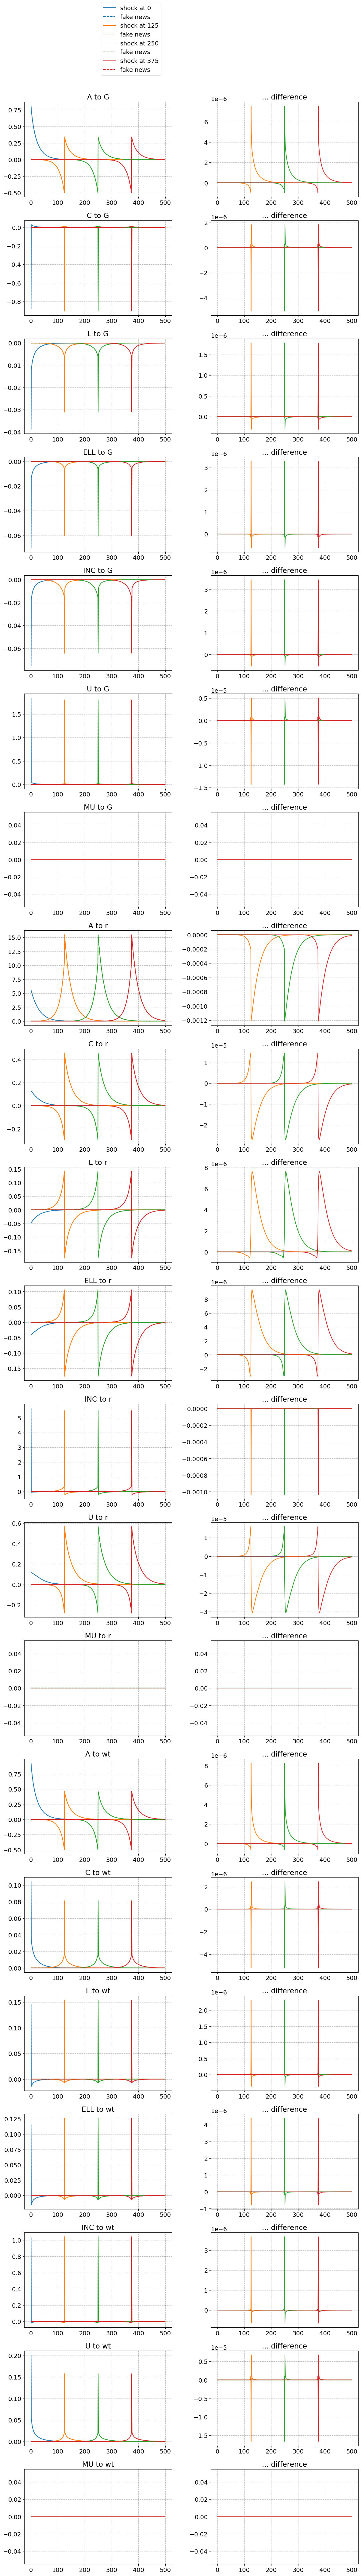

In [25]:
model_trans.test_jacs()

In [33]:
model_sLow.find_ss()

/Users/emmagundersen/GEModelTools/GEModelTools/GEModelClass.py:1644: UserWarning: warning: variable G_exp contains nan (blocks.government)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')
/Users/emmagundersen/GEModelTools/GEModelTools/GEModelClass.py:1644: UserWarning: warning: variable G_share contains nan (blocks.government)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')
/Users/emmagundersen/GEModelTools/GEModelTools/GEModelClass.py:1644: UserWarning: warning: variable G_exp contains nan (blocks.market_clearing)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')
/Users/emmagundersen/GEModelTools/GEModelTools/GEModelClass.py:1644: UserWarning: warning: variable G_exp_share contains nan (blocks.market_clearing)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')
/Users/emmagundersen/GEModelTools/GEModelTools/GEModelClass.py:1644: UserWarning: warning: variable G_exp contains nan (blocks.add

note: differences should only be due to numerical errors

direct method:
finding Jacobian wrt. ghost          : 0 125 250 375 [computed in 11.0 secs]
finding Jacobian wrt. G              : 0 125 250 375 [computed in 11.0 secs]
finding Jacobian wrt. r              : 0 125 250 375 [computed in 11.0 secs]
finding Jacobian wrt. wt             : 0 125 250 375 [computed in 11.4 secs]
household Jacobian computed in 44.4 secs

fake news method:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for G               in 10.0 secs
curly_Y and curly_D calculated for r               in 9.8 secs
curly_Y and curly_D calculated for wt              in 9.8 secs
curly_E calculated in 0.1 secs
builiding blocks combined in 0.2 secs
household Jacobian computed in 29.8 secs

full Jacobian to unknowns computed in 0.8 secs [in evaluate_blocks(): 0.4 secs]
full Jacobian to shocks computed in 0.6 secs [in evaluate_blocks(): 0.3 secs]


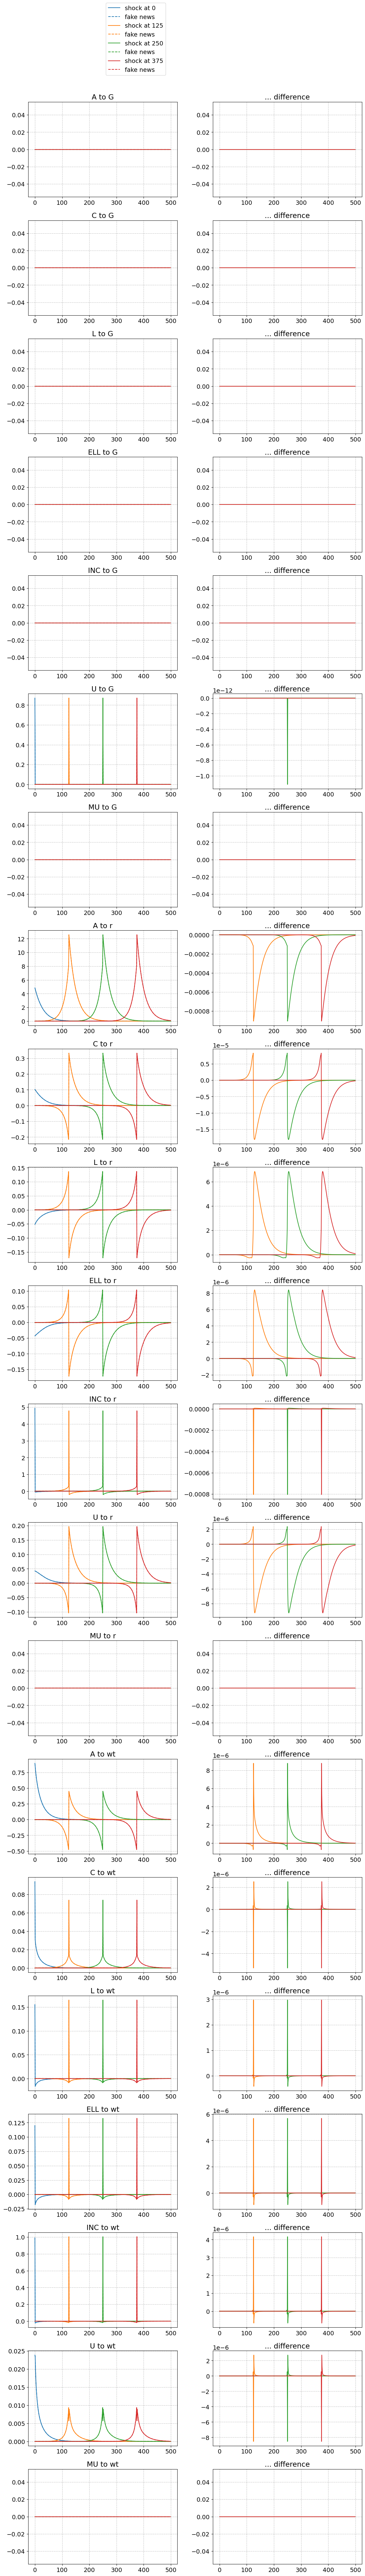

: 

In [34]:
model_sLow.compute_jacs()
model_sLow.test_jacs()

In [32]:
model_trans.find_transition_path(do_print=True,shocks=[])

/Users/emmagundersen/GEModelTools/GEModelTools/GEModelClass.py:1644: UserWarning: warning: variable G_exp contains nan (blocks.additional_var)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')
/Users/emmagundersen/GEModelTools/GEModelTools/GEModelClass.py:1644: UserWarning: warning: variable G_share contains nan (blocks.additional_var)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')
/Users/emmagundersen/GEModelTools/GEModelTools/GEModelClass.py:1644: UserWarning: warning: variable G_exp_share contains nan (blocks.additional_var)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')


G_share: terminal value is   0.12089432, but ss value is   0.10785524
clearing_Y: terminal value is  -0.00000000, but ss value is  -0.00000231
G_exp_share: terminal value is   0.33542699, but ss value is   0.26106979


In [28]:
# a. Copy model

model_trans = dict_base['TFP = 2.0']['G = 0.25']




# d. Compute jacobians
model_trans.compute_jacs(do_print=False)#Copying the initial values from the original ss

ini_ = model_sLow.ini.__dict__.copy()




# b. find transition path
model_trans.find_transition_path(do_print=False,shocks=[], ini=ini_)

model_trans.show_IRFs(varnames=model_trans.varlist, lvl_value=['INC_hh'], T_max=100)

[[5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75814159]
 [5.75

/Users/emmagundersen/GEModelTools/GEModelTools/GEModelClass.py:1644: UserWarning: warning: variable rK contains nan (blocks.production_firm)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')
/Users/emmagundersen/GEModelTools/GEModelTools/GEModelClass.py:1644: UserWarning: warning: variable w contains nan (blocks.production_firm)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')
/Users/emmagundersen/GEModelTools/GEModelTools/GEModelClass.py:1644: UserWarning: warning: variable Y contains nan (blocks.production_firm)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')
/Users/emmagundersen/GEModelTools/GEModelTools/GEModelClass.py:1644: UserWarning: warning: variable rK contains nan (blocks.mutual_fund)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')
/Users/emmagundersen/GEModelTools/GEModelTools/GEModelClass.py:1644: UserWarning: warning: variable r contains nan (blocks.mutual_fund)
  warnings

AssertionError: invalid values in path.r

In [30]:
# b. find transition path
model_trans.find_transition_path(do_print=False,shocks=[], ini=ini_)


AssertionError: invalid values in path.r